In [1]:
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import yaml
from operator import itemgetter
import pandas as pd
import os
from matplotlib import rc
rc('text', usetex=True)
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy import interpolate


import figures, growth


/home/lasbleis-m/Research/mush/mush.py:183: RuntimeWarning: divide by zero encountered in true_divide
  _inter = (K0 + 4. / 3. * variable) * (1. - variable) / variable
/home/lasbleis-m/Research/mush/mush.py:196: RuntimeWarning: invalid value encountered in multiply
  radius[:-2]**2 / (radius[0:-2] + dr / 2)**2
/home/lasbleis-m/Research/mush/mush.py:199: RuntimeWarning: invalid value encountered in multiply
  - _inter[1:] / dr**2 * variable[:-1] * variable[1:] * \
/home/lasbleis-m/Research/mush/mush.py:200: RuntimeWarning: invalid value encountered in multiply
  radius[1:-1]**2 / (radius[1:-1] + dr / 2)**2
/home/lasbleis-m/Research/mush/mush.py:202: RuntimeWarning: invalid value encountered in multiply
  radius[2:]**2 / (radius[1:-1] + dr / 2)**2
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/home/lasbleis-m/anaconda3/envs/py36

Dt supercooling 0.48899999999999993
1.0
0.5


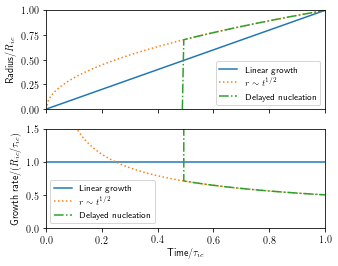

In [2]:
growth.plot_growth()

 # Diagram n=3

In [3]:
folder = "/home/lasbleis-m/Research/output_mush/diag_random_n3_all/"
data_n3 = figures.diagram_data(folder, "diag_random.csv")



Looking through folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all/
oups, not a folder: /home/lasbleis-m/Research/output_mush/diag_random_n3_all//data.csv
Run not finished for R 947.0982049419993, dot_R 9.422017206081331e-05: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all//exp_1.00e+00_coeff_9.42e-05_radius_9.47e+02
645.79 947.0982049419993
oups, not a folder: /home/lasbleis-m/Research/output_mush/diag_random_n3_all//diag_random.csv
Run not finished for R 990.1117469153911, dot_R 0.00011101962942087649: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all//exp_1.00e+00_coeff_1.11e-04_radius_9.90e+02
488.32 990.1117469153911
Run not finished for R 0.0010112211334163271, dot_R 414.9533637921495: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all//exp_1.00e+00_coeff_4.15e+02_radius_1.01e-03
0.00062696 0.0010112211334163271


/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=23,23 m=819 fp=0.043413 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=19,19 m=819 fp=0.000286 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


R=2, dotR=-1.5, delta=[8.32169731], phi=[0.08219871]
R=2, dotR=-2, delta=[3.1085458], phi=[0.02484859]
R=2, dotR=-3, delta=[0.89080106], phi=[0.00352371]


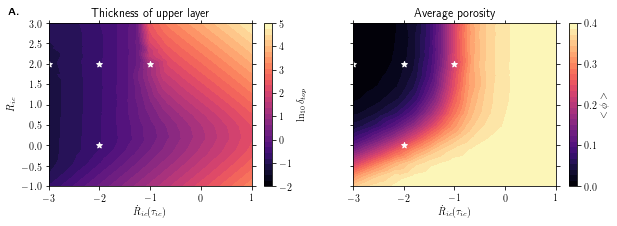

In [4]:
fig, ax = figures.diagram(data_n3, ylim=[-1, 3], xlim=[-3, 1])  
data_n3["dot_r"] = data_n3["Ric_adim"]/data_n3["tau_ic"]*data_n3["exp"]
x = np.log(np.array(data_n3["dot_r"].values).astype(float))/np.log(10.)
y = np.log(np.array(data_n3["Ric_adim"].values).astype(float))/np.log(10.) # radius IC
delta = np.log(np.array(data_n3["delta"].values).astype(float))/np.log(10.)
phi = np.array(data_n3["sum_phi"].values).astype(float) # 
# ax[0].scatter(x, y, s=1)

subset = data_n3[data_n3["Ric_adim"]>10**1.9]
subset = subset[subset["Ric_adim"]<10**3.1]
subset = subset[subset["dot_r"]<2e-1]
subset = subset[subset["dot_r"]>2e-3]
#subset=subset[subset["folder"]=="exp_1.00e+00_coeff_2.79e-03_radius_4.72e+02"]
#subset=subset[subset["folder"]=="exp_1.00e+00_coeff_4.36e-02_radius_4.60e+02"]

#subset=subset[subset["folder"]=="exp_1.00e+00_coeff_4.58e-02_radius_4.91e+02"]

#x = np.log(np.array(subset["dot_r"].values).astype(float))/np.log(10.)
#y = np.log(np.array(subset["Ric_adim"].values).astype(float))/np.log(10.) # radius IC
#ax[0].scatter(x, y)

#print(subset["folder"])

R = [2, 2, 2, 0]
dot_R = [-3, -2, -1, -2]

ax[0].scatter(dot_R, R, c="w", marker="*")
ax[1].scatter(dot_R, R, c="w", marker="*")

ax[0].tick_params(direction="out", top=True, right=True)
ax[1].tick_params(direction="out", top=True, right=True)

ax[0].text(-0.2, 1.10, r"\textbf{A.}", transform=ax[0].transAxes, fontsize=11,
            verticalalignment='top')


#ax[0].grid(True, linestyle='dashed')

plt.savefig("fig/Diagram_n3_exp1.pdf", transparent=True, bbox_inches="tight")


# Interpolate values in Ric=10e2 and dot R = 10e-2 and 10e-1

f_delta = interpolate.interp2d(x, y, delta, kind='cubic')
f_phi = interpolate.interp2d(x, y, phi, kind='cubic')

R=2
dotR = -1.5
print("R={}, dotR={}, delta={}, phi={}".format(R, dotR, 10**f_delta(dotR, R)*12.21, f_phi(dotR, R)))
dotR = -2
print("R={}, dotR={}, delta={}, phi={}".format(R, dotR, 10**f_delta(dotR, R)*12.21, f_phi(dotR, R)))
dotR = -3
print("R={}, dotR={}, delta={}, phi={}".format(R, dotR, 10**f_delta(dotR, R)*12.21, f_phi(dotR, R)))


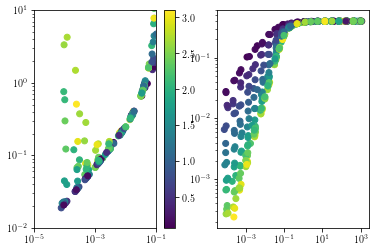

In [5]:


values = data_n3[data_n3["Ric_adim"]>1.]
#values = values[values["Nmax"]>15000]


fig, ax = plt.subplots(1, 2)

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_yscale("log")


sc = ax[0].scatter(values["dot_r"], values["delta"], c=np.log10(values["Ric_adim"]))
ax[1].scatter(values["dot_r"], values["sum_phi"], c=np.log10(values["Ric_adim"]))



ax[0].set_xlim([10**-5, 10**-1])
ax[0].set_ylim([0.01, 10])
fig.colorbar(sc, ax=ax[0])

 # N=3 and exp=0.5

In [6]:
folder = "/home/lasbleis-m/Research/output_mush/diag_random_n3_exp05/"
data_n3_rand = figures.diagram_data(folder, "diag_random.csv")

Looking through folder /home/lasbleis-m/Research/output_mush/diag_random_n3_exp05/
Run not finished for R 376.4587585575859, dot_R 0.013193426797674396: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_exp05//exp_5.00e-01_coeff_1.32e-02_radius_3.76e+02
93.286 376.4587585575859
Run not finished for R 290.37281132801246, dot_R 0.03482413212651345: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_exp05//exp_5.00e-01_coeff_3.48e-02_radius_2.90e+02
246.24 290.37281132801246
no boundary for R 0.0009894954886609613, dot_R 929.3893254610364: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_exp05//exp_5.00e-01_coeff_9.29e+02_radius_9.89e-04
no boundary for R 0.010235859092016372, dot_R 556.3461127012912: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_exp05//exp_5.00e-01_coeff_5.56e+02_radius_1.02e-02
no boundary for R 0.0009310349489990877, dot_R 24.2990836189467: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_exp05//exp_5.00e-01_coeff_

In [7]:
data_n3_rand["dot_r"] = data_n3_rand["Ric_adim"]/data_n3_rand["tau_ic"]*data_n3_rand["exp"]

R=2, dotR=-1.0, delta=[226.60120348], phi=[0.26554284]
R=2, dotR=-1.5, delta=[3.80934559], phi=[0.11360741]
R=2, dotR=-2, delta=[2.06392582], phi=[0.047806]
R=2, dotR=-3, delta=[0.56179898], phi=[0.00463585]


/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=21,20 m=455 fp=7.605765 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=22,22 m=455 fp=0.000001 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


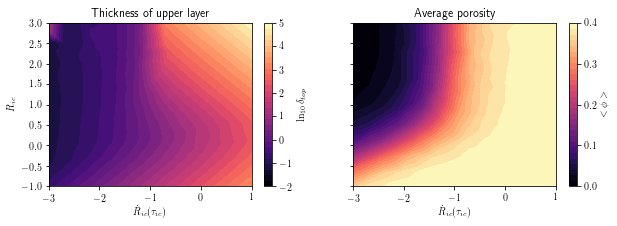

In [8]:
figures.diagram(data_n3_rand, ylim=[-1, 3], xlim=[-3, 1]) 
plt.savefig("fig/Diagram_n3_exp05.pdf", transparent=True) 


data_n3_rand["dot_r"] = data_n3_rand["Ric_adim"]/data_n3_rand["tau_ic"]*data_n3_rand["exp"]
x = np.log(np.array(data_n3_rand["dot_r"].values).astype(float))/np.log(10.)
y = np.log(np.array(data_n3_rand["Ric_adim"].values).astype(float))/np.log(10.) # radius IC
delta = np.log(np.array(data_n3_rand["delta"].values).astype(float))/np.log(10.)
phi = np.array(data_n3_rand["sum_phi"].values).astype(float) # 


f_delta = interpolate.interp2d(x, y, delta, kind='cubic')
f_phi = interpolate.interp2d(x, y, phi, kind='cubic')


R=2
dotR = -1.
print("R={}, dotR={}, delta={}, phi={}".format(R, dotR, 10**f_delta(dotR, R)*12.21, f_phi(dotR, R)))
dotR = -1.5
print("R={}, dotR={}, delta={}, phi={}".format(R, dotR, 10**f_delta(dotR, R)*12.21, f_phi(dotR, R)))
dotR = -2
print("R={}, dotR={}, delta={}, phi={}".format(R, dotR, 10**f_delta(dotR, R)*12.21, f_phi(dotR, R)))
dotR = -3
print("R={}, dotR={}, delta={}, phi={}".format(R, dotR, 10**f_delta(dotR, R)*12.21, f_phi(dotR, R)))


## Scaling laws

In [15]:
# select values for Ric between 1 and 2
# plot delta and <phi>


folder = "/home/lasbleis-m/Research/output_mush/scalinglaw/"
data_1 = figures.diagram_data(folder, "diag.csv")


#folder = "/home/lasbleis-m/Research/output_mush/ref_for_supercooling/"
#data_2 = figures.diagram_data(folder, "diag.csv")

values = data_1 #pd.concat([data_1, data_2])
values = values[values["exp"]==1.]

values["dot_r"] = values["Ric_adim"]/values["tau_ic"]*values["exp"] 
#values = data_n3_rand[data_n3_rand["Ric_adim"]>8.]
#values = values[values["Ric_adim"]]

values = values[values["Nmax"]>15000]

print(values["Nmax"].unique())

values["logdot_r"]=np.log10(values["dot_r"])
print(np.sort(values["logdot_r"].unique()))

values["logr"]=np.log10(values["Ric_adim"])
print(np.sort(values["logr"].unique()))

#values = values[values["logdot_r"]<-1.5]



#ax[0].set_xscale("log")
#ax[0].set_yscale("log")
#ax[1].set_xscale("log")
#ax[1].set_yscale("log")


#sc = ax[0].scatter(values["dot_r"], values["delta"], c=np.log10(values["Ric_adim"]))
#ax[1].scatter(values["dot_r"], values["sum_phi"], c=np.log10(values["Ric_adim"]))



#ax[0].set_xlim([10**-5, 10**-1])
#ax[0].set_ylim([0.01, 10])
#fig.colorbar(sc, ax=ax[0])




Looking through folder /home/lasbleis-m/Research/output_mush/scalinglaw/
Run not finished for R 1000.0, dot_R 0.1414213562373095: folder /home/lasbleis-m/Research/output_mush/scalinglaw//exp_5.00e-01_coeff_1.41e-01_radius_1.00e+03
915.65 1000.0
Run not finished for R 1000.0, dot_R 0.3353628856001657: folder /home/lasbleis-m/Research/output_mush/scalinglaw//exp_5.00e-01_coeff_3.35e-01_radius_1.00e+03
201.8 1000.0
Run not finished for R 31.622776601683796, dot_R 0.07952707287670507: folder /home/lasbleis-m/Research/output_mush/scalinglaw//exp_5.00e-01_coeff_7.95e-02_radius_3.16e+01
12.684000000000001 31.622776601683796
Run not finished for R 31.622776601683793, dot_R 0.2514866859365871: folder /home/lasbleis-m/Research/output_mush/scalinglaw//exp_5.00e-01_coeff_2.51e-01_radius_3.16e+01
12.79 31.622776601683793
oups, not a folder: /home/lasbleis-m/Research/output_mush/scalinglaw//diag.csv
Run not finished for R 31.622776601683796, dot_R 0.044721359549995794: folder /home/lasbleis-m/Resear

/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5 ]
[2.  2.5 3. ]
[1.2025443  3.19890194]


TypeError: expected non-empty vector for x

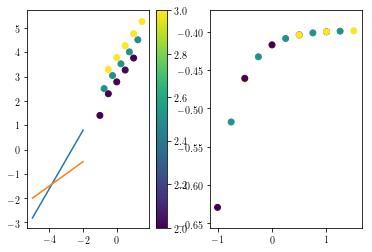

In [16]:
values["logdot_r"]=np.log10(values["dot_r"])
print(np.sort(values["logdot_r"].unique()))

values["logr"]=np.log10(values["Ric_adim"])
print(np.sort(values["logr"].unique()))


logR = np.log10(values["Ric_adim"])
logdot_r = np.log10(values["dot_r"])
logdelta = np.log10(values["delta"])
logphi = np.log10(values["sum_phi"])



fig, ax = plt.subplots(1, 2)


a = np.polyfit(logdot_r, logdelta, 1)
print(a)
ax[0].plot([-5, -2], np.array([-5, -2])*a[0]+a[1])

sc = ax[0].scatter(logdot_r, logdelta, c=logR)
ax[1].scatter(logdot_r, logphi, c=logR)

ax[0].plot([-5, -2], [-2, -0.5])

fig.colorbar(sc, ax=ax[0])


#ax[1].plot([-5, -2], [-2, -0.5])

dataset_R_2 = values[values["logr"]==2.]
dataset_R_3 = values[values["logr"]==3.]
dataset_R_25 = values[values["logr"]==2.5]
dataset_R_15 = values[values["logr"]==1.5]

datasets = [dataset_R_15, dataset_R_2,  dataset_R_25, dataset_R_3]
exp = [0., 0., 0., 0.]
inte = [0., 0., 0., 0.]
for i, dataset in enumerate(datasets):
    logR = np.log10(dataset["Ric_adim"])
    logdot_r = np.log10(dataset["dot_r"])
    logphi = np.log10(dataset["sum_phi"])
    a = np.polyfit(logdot_r, logphi, 1)
    print(a[0], a[1])
    ax[1].scatter(logdot_r, logphi, c='k', marker="*")
    ax[1].plot([-5, -2], np.array([-5, -2])*a[0]+a[1])
    exp[i] = a[0]
    inte[i] = a[1]
    
logR = np.log10(values["Ric_adim"])
logdot_r = np.log10(values["dot_r"])
logdelta = np.log10(values["delta"])
logphi = np.log10(values["sum_phi"])  
logphi_test = logdot_r*(0.217*logR+0.42) +0.41*logR-0.522
ax[1].scatter(logdot_r, logphi_test, c='r', marker='x')
ax[0].grid()
ax[1].grid()
    
fig, ax = plt.subplots()

ax.plot([1.5, 2., 2.5,  3.], exp, '+')
a = np.polyfit([1.5, 2., 2.5,  3.], exp, 1)
print(a)
ax.plot([1.5, 3], np.array([1.5, 3.])*a[0]+a[1])

fig, ax = plt.subplots()
ax.plot([1.5, 2., 2.5,  3.], inte, '+')
a = np.polyfit([1.5, 2., 2.5,  3.], inte, 1)
print(a)
ax.plot([1.5, 3], np.array([1.5, 3.])*a[0]+a[1])

In [11]:
# select values for Ric between 1 and 2
# plot delta and <phi>


folder = "/home/lasbleis-m/Research/output_mush/scalinglaw/"
data_1 = figures.diagram_data(folder, "diag.csv")


#folder = "/home/lasbleis-m/Research/output_mush/ref_for_supercooling/"
#data_2 = figures.diagram_data(folder, "diag.csv")

values = data_1 #pd.concat([data_1, data_2])
values = values[values["exp"]==1.]


print(values)

values["dot_r"] = values["Ric_adim"]/values["tau_ic"]*values["exp"] 
#values = data_n3_rand[data_n3_rand["Ric_adim"]>8.]
#values = values[values["Ric_adim"]]

#values = values[values["Nmax"]>15000]

print(values["Nmax"].unique())

values["logdot_r"]=np.log10(values["dot_r"])
print(np.sort(values["logdot_r"].unique()))

values["logr"]=np.log10(values["Ric_adim"])
print(np.sort(values["logr"].unique()))

#values = values[values["logdot_r"]<-1.5]


Looking through folder /home/lasbleis-m/Research/output_mush/scalinglaw/
Run not finished for R 1000.0, dot_R 0.1414213562373095: folder /home/lasbleis-m/Research/output_mush/scalinglaw//exp_5.00e-01_coeff_1.41e-01_radius_1.00e+03
915.65 1000.0
Run not finished for R 1000.0, dot_R 0.3353628856001657: folder /home/lasbleis-m/Research/output_mush/scalinglaw//exp_5.00e-01_coeff_3.35e-01_radius_1.00e+03
201.8 1000.0
Run not finished for R 31.622776601683796, dot_R 0.07952707287670507: folder /home/lasbleis-m/Research/output_mush/scalinglaw//exp_5.00e-01_coeff_7.95e-02_radius_3.16e+01
12.684000000000001 31.622776601683796
Run not finished for R 31.622776601683793, dot_R 0.2514866859365871: folder /home/lasbleis-m/Research/output_mush/scalinglaw//exp_5.00e-01_coeff_2.51e-01_radius_3.16e+01
12.79 31.622776601683793
oups, not a folder: /home/lasbleis-m/Research/output_mush/scalinglaw//diag.csv
Run not finished for R 31.622776601683796, dot_R 0.044721359549995794: folder /home/lasbleis-m/Resear

/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

[-1.5  -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5 ]
[1.  2.  2.5 3. ]
[1.52436949 2.81654508]


/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


TypeError: expected non-empty vector for x

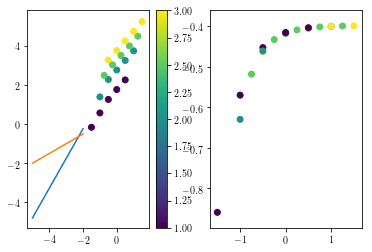

In [12]:
values["logdot_r"]=np.log10(values["dot_r"])
print(np.sort(values["logdot_r"].unique()))

values["logr"]=np.log10(values["Ric_adim"])
print(np.sort(values["logr"].unique()))


logR = np.log10(values["Ric_adim"])
logdot_r = np.log10(values["dot_r"])
logdelta = np.log10(values["delta"])
logphi = np.log10(values["sum_phi"])




fig, ax = plt.subplots(1, 2)


a = np.polyfit(logdot_r, logdelta, 1)
print(a)
ax[0].plot([-5, -2], np.array([-5, -2])*a[0]+a[1])

sc = ax[0].scatter(logdot_r, logdelta, c=logR)
ax[1].scatter(logdot_r, logphi, c=logR)

ax[0].plot([-5, -2], [-2, -0.5])

fig.colorbar(sc, ax=ax[0])


#ax[1].plot([-5, -2], [-2, -0.5])

dataset_R_2 = values[values["logr"]==2.]
dataset_R_3 = values[values["logr"]==3.]
dataset_R_25 = values[values["logr"]==2.5]
dataset_R_15 = values[values["logr"]==1.5]

datasets = [dataset_R_15, dataset_R_2,  dataset_R_25, dataset_R_3]
exp = [0., 0., 0., 0.]
inte = [0., 0., 0., 0.]
for i, dataset in enumerate(datasets):
    logR = np.log10(dataset["Ric_adim"])
    logdot_r = np.log10(dataset["dot_r"])
    logphi = np.log10(dataset["sum_phi"])
    a = np.polyfit(logdot_r, logphi, 1)
    print(a[0], a[1])
    ax[1].scatter(logdot_r, logphi, c='k', marker="*")
    ax[1].plot([-5, -2], np.array([-5, -2])*a[0]+a[1])
    exp[i] = a[0]
    inte[i] = a[1]
    
logR = np.log10(values["Ric_adim"])
logdot_r = np.log10(values["dot_r"])
logdelta = np.log10(values["delta"])
logphi = np.log10(values["sum_phi"])  
logphi_test = logdot_r*(0.217*logR+0.42) +0.41*logR-0.522
ax[1].scatter(logdot_r, logphi_test, c='r', marker='x')
ax[0].grid()
ax[1].grid()
    
fig, ax = plt.subplots()

ax.plot([1.5, 2., 2.5,  3.], exp, '+')
a = np.polyfit([1.5, 2., 2.5,  3.], exp, 1)
print(a)
ax.plot([1.5, 3], np.array([1.5, 3.])*a[0]+a[1])

fig, ax = plt.subplots()
ax.plot([1.5, 2., 2.5,  3.], inte, '+')
a = np.polyfit([1.5, 2., 2.5,  3.], inte, 1)
print(a)
ax.plot([1.5, 3], np.array([1.5, 3.])*a[0]+a[1])

 # comparison final state n=2 or n=3

In [ ]:
folder_base = "/home/lasbleis-m/Research/output_mush/comparison_n2_n3/"

folders = os.listdir(folder_base)
folders = [x  for x  in folders if x[0]=="n"]
fig2, ax2 = plt.subplots(figsize=[6, 4])


pvalues = [0, -1, -2, -3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
                
        try:
            n = options["n"]
        except KeyError:
            n = 2
          
        val = np.log10(options["coeff_velocity"])
        if n == 2: 
            ligne = "-"
            legend = r"$\dot R_{{ic}}$ : {}".format(options["coeff_velocity"])
        else: 
            ligne = "--"
            legend = ""
        
        
        colors = plt.cm.viridis(norm(val))
        name_max = max(timesteps.items(), key=itemgetter(1))[0]
        data = pd.read_csv(name_max, sep=" ")
        dr = data["radius"][1]-data["radius"][0]
        ax2.plot((data["radius"] + dr / 2.)/options["Ric_adim"], data["porosity"], ligne, color=colors, label=legend)
        
        stat = pd.read_csv(file_stat, sep=" ", index_col=False)
        stat = stat["thickness_boundary"]
        print("{}, {}".format(n, options["coeff_velocity"]))
        print("delta is {}".format(stat.tail(1).item()))

ax2.set_xlim([0, 1])
ax2.set_ylim([0, 0.4])
ax2.set_ylabel("Porosity")
ax2.set_xlabel("Radius/$ R_{{ic}}$")
leg = ax2.legend()


lines = ax2.get_lines()
#legend1 = pyplot.legend([lines[i] for i in [1, 2, 4]], ["algo1", "algo2", "algo3"], loc=1)
legend2 = plt.legend([lines[i] for i in [5, 2]], ["n = 2", "n = 3"])
ax2.add_artist(legend2)
ax2.add_artist(leg)


plt.savefig("fig/comparison_n2_n3.pdf")


 # No growth

In [ ]:
folder_base = "/home/lasbleis-m/Research/output_mush/no_growth_n3_all_points/"
folders = os.listdir(folder_base)

fig, ax = plt.subplots()

columns = ["Ric_adim", "time"]
df = pd.DataFrame(columns=columns)

columns = ["Ric_adim", "sum_phi", "time"]
data_all = pd.DataFrame(columns=columns)

def add_value(df, ric, time):
        df_add = pd.DataFrame({"Ric_adim":[ric], "time": time})
        df = df.append(df_add)
        return df

pvalues = [-2, 3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
        val = np.log10(options["Ric_adim"])
        co = plt.cm.viridis(norm(val))
        data = pd.read_csv(file_stat, sep=" ", index_col=False)
        ax.plot(data['time'], data["sum_phi"], color=co)
        
        save_data = data[["time", "sum_phi"]].copy()
        save_data["Ric_adim"] = options["Ric_adim"]
        data_all = data_all.append(save_data)
        
        data["phi0.3"] =  np.abs(data["sum_phi"]-0.2)
        time = data["time"].iloc[data["phi0.3"].idxmin()]
        
        df = add_value(df, options["Ric_adim"], time)
        
ax.set_xlim([0, 500])
ax.set_ylim([0, 0.4])

fig, ax = plt.subplots()
df.sort_values(by="Ric_adim",  inplace=True)
ax.plot(np.log10(df["Ric_adim"]), np.log10(df["time"]))
ax.plot([0.6, 2.1], [1.5, 3.])


fig, ax = plt.subplots()
data_all = data_all[data_all["time"]>0.]
time = data_all["time"].values
Ric = data_all["Ric_adim"].values
phi = data_all["sum_phi"].values
ax.tricontourf(time/1000, np.log10(Ric), phi, 20)
#ax.plot(time, np.log10(Ric),'.')


# if needed to use log time
fig, ax =plt.subplots()
xi = np.linspace(-1, 3., 200)
yi = np.linspace(-2, 3., 50)
from scipy.interpolate import griddata
#zi = griddata(time, np.log10(Ric), phi, xi, yi, interp='linear')
zi = griddata((np.log10(time), np.log10(Ric)), phi, (xi[None,:], yi[:,None]), method='cubic')
sc = ax.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
fig.colorbar(sc)



 # Profiles pf evolution for no-growth:

 - R = 1e-1
 - R = 10
 - R = 100

In [ ]:
folders = [ #"/home/lasbleis-m/Research/output_mush/no_growth_n3_100figs/output_1.00e-02",
           "/home/lasbleis-m/Research/output_mush/no_growth_n3_100fig/output_1.00e-01", 
           "/home/lasbleis-m/Research/output_mush/no_growth_n3_100fig/output_1.00e+00", 
           "/home/lasbleis-m/Research/output_mush/no_growth_n3_100fig/output_1.00e+01",
           "/home/lasbleis-m/Research/output_mush/no_growth_n3_100fig/output_1.00e+02"
           ]

fig2, ax2 = plt.subplots(figsize=[6,4])

for folder in folders:
    #fig, ax = plt.subplots()
    file_stat, param, timesteps = figures.extract_files(folder)
    name_max = max(timesteps.items(), key=itemgetter(1))[0]
    data = pd.read_csv(name_max, sep=" ")
    dr = data["radius"][1]-data["radius"][0]
    print("Ric = {:.0e} or {:.0e}".format(param["Ric_adim"], data["radius"].iloc[-1]))
    Radius = np.array(data["radius"].values)+ dr / 2.
    #print(Radius)
    Time = np.array(sorted(timesteps.values()))
    #print((Time))
    X, Y = np.meshgrid(Time, Radius)
    Z = np.ones_like(X)
    #print(timesteps)
    for i, (name, time) in enumerate(sorted(timesteps.items(), key = itemgetter(1))):
        data = pd.read_csv(name, sep=" ")
        #Porosity = np.array(data["porosity"].values)
        #N_r = len(Porosity)
        dr = data["radius"][1]-data["radius"][0]
        Porosity = np.array(data["porosity"].values)
        N_r = len(Porosity)
        Z[:N_r, i] = Porosity
        #if i%50==0: ax.plot(data["radius"] + dr / 2., data["porosity"], label="t = {:.1f}".format(time))
        if np.abs(time-200)<1: ax2.plot((data["radius"] + dr / 2.)/param["Ric_adim"], data["porosity"], label="Ric = {:.0e}".format(param["Ric_adim"]))
            
    #ax.set_ylim([0, 0.4])
    #ax.set_xlim([0., data["radius"].iloc[-1]+dr/2])
    #ax.legend()
    fig3, ax3 = plt.subplots()
    sc = ax3.contourf(X, Y, Z,  extend="max", vmin=0, vmax = 0.4)
    
ax2.legend()
ax2.set_ylim([0, 0.4])
ax2.set_xlim([0.,1.])
ax2.set_xlabel("Radius/Ric")
ax2.set_ylabel("Porosity")
ax2.set_title("time = 200")



 # Supercooling

In [17]:
folder = "/home/lasbleis-m/Research/output_mush/supercooling_4/"

def add_value(df, ric, coeff, exp, phi, delta, r0_supercooling, tau_ic):
    df_add = pd.DataFrame({"Ric_adim":[ric], "coeff_velocity":[coeff], "exp":[exp], 
                           "sum_phi":[phi], "delta":[delta], 
                           "r0_supercooling":[r0_supercooling], 
                           "tau_ic":[tau_ic]})
    df = df.append(df_add, ignore_index=True)
    return df

list_subfolder = os.listdir(folder)
print("Looking through folder {}".format(folder))

columns = ["Ric_adim", "coeff_velocity", "exp", "sum_phi", "delta", "r0_supercooling", "tau_ic"]
df = pd.DataFrame(columns=columns)

for subfolder_name in list_subfolder:
            if os.path.isdir(folder + "/" + subfolder_name):
                list_files = os.listdir(folder+"/"+subfolder_name)
                for file in list_files:
                    if file[-14:] == "statistics.txt":
                        file_stat = folder + "/" + subfolder_name + "/" + file
                    if file[-5:] == ".yaml":
                        with open(folder + "/" + subfolder_name + "/" + file, 'r') as stream:
                            try:
                                param = yaml.safe_load(stream)
                                #print(param)
                            except yaml.YAMLError as exc:
                                print(exc)
                data = pd.read_csv(file_stat, sep=" ", index_col=False)
                if data["radius"].iloc[-1] < 0.99*param["Ric_adim"]:
                    remarks = "run ended before completion. Radius {}/{}".format(data["radius"], param["Ric_adim"])
                else:
                    remarks = ""
                remarks=remarks+subfolder_name
                if data["thickness_boundary"].iloc[-1] < 1e-12:
                    pass #print("no boundary for {}, {}".format(param["Ric_adim"], param['coeff_velocity']))
                df = add_value(df, param["Ric_adim"], param['coeff_velocity'], param['growth_rate_exponent'], 
                            data["sum_phi"].iloc[-1], data["thickness_boundary"].iloc[-1], 
                               param["r0_supercooling"], param["tic"])
            else: print("oups, not a folder: {}".format(folder + "/" + subfolder_name))
df.to_csv(folder+"data.csv")

df["r_dot"] = df["Ric_adim"]/df["tau_ic"]*df["exp"]
df = df.sort_values(by=["Ric_adim", 'r_dot', "sum_phi"]).reset_index(drop=True)

#print(df[df["sum_phi"]<0.3])



Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_4/
oups, not a folder: /home/lasbleis-m/Research/output_mush/supercooling_4//data.csv


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2cb8e058c8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'sum_phi'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/lasbleis-m/.cache/matplotlib/tex.cache/f3782a18c971b2854eeffbea1bcca027.
tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f3782a18c971b2854eeffbea1bcca027.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily sum_
                                                  phi}
No pages of output.
Transcript written on f3782a18c971b2854eeffbea1bcca027.log.




RuntimeError: latex was not able to process the following string:
b'sum_phi'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/lasbleis-m/.cache/matplotlib/tex.cache/f3782a18c971b2854eeffbea1bcca027.
tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f3782a18c971b2854eeffbea1bcca027.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily sum_
                                                  phi}
No pages of output.
Transcript written on f3782a18c971b2854eeffbea1bcca027.log.




<Figure size 432x288 with 1 Axes>

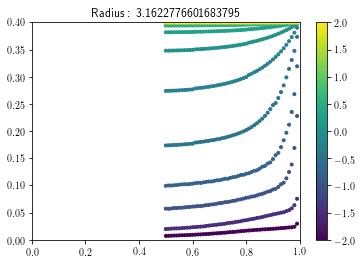

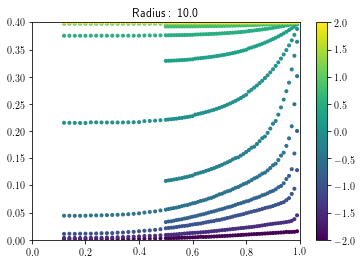

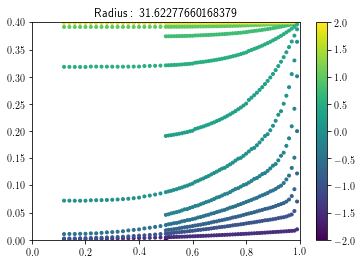

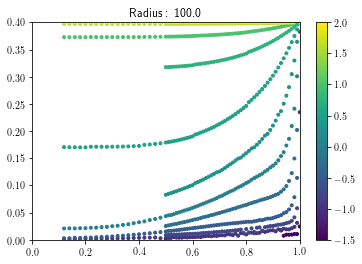

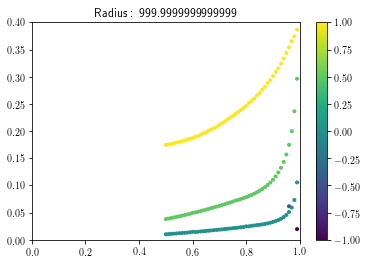

In [18]:
df.plot(y="sum_phi", use_index=True)
error=1e-12

def select_unique(dataframe):
    values = dataframe.unique()
    keep_values = np.abs(np.diff(values))>error
    keep_values = np.insert(keep_values,0,True)
    return values[keep_values]

coeff_1 = df[df["Ric_adim"]==100.]
coeff_01 = df[df["Ric_adim"]==10**1.5]
coeff_10 = df[df["Ric_adim"]==10.]


#markers = ["x", "v","^"]
# fig, ax = plt.subplots()

radii = select_unique(df["Ric_adim"])

for radius in (radii):
    values = df[np.abs(df["Ric_adim"]-radius)<error]
    fig, ax = plt.subplots()
    sc = ax.scatter(values["r0_supercooling"]/values["Ric_adim"], values["sum_phi"], 
               c= np.log10(values['coeff_velocity']), 
               marker='.',  cmap=plt.cm.get_cmap("viridis"))
    fig.colorbar(sc)
    ax.set_ylim([0, 0.4])
    ax.set_xlim([0, 1])
    ax.set_title("Radius : {}".format(radius))



In [19]:
folder = "/home/lasbleis-m/Research/output_mush/supercooling_diagram/"

def add_value(df, ric, coeff, exp, phi, delta, r0_supercooling, tau_ic):
    df_add = pd.DataFrame({"Ric_adim":[ric], "coeff_velocity":[coeff], "exp":[exp], 
                           "sum_phi":[phi], "delta":[delta], 
                           "r0_supercooling":[r0_supercooling], 
                           "tau_ic":[tau_ic]})
    df = df.append(df_add, ignore_index=True)
    return df

list_subfolder = os.listdir(folder)
print("Looking through folder {}".format(folder))

columns = ["Ric_adim", "coeff_velocity", "exp", "sum_phi", "delta", "r0_supercooling", "tau_ic"]
df = pd.DataFrame(columns=columns)

for subfolder_name in list_subfolder:
            if os.path.isdir(folder + "/" + subfolder_name):
                list_files = os.listdir(folder+"/"+subfolder_name)
                for file in list_files:
                    if file[-14:] == "statistics.txt":
                        file_stat = folder + "/" + subfolder_name + "/" + file
                    if file[-5:] == ".yaml":
                        with open(folder + "/" + subfolder_name + "/" + file, 'r') as stream:
                            try:
                                param = yaml.safe_load(stream)
                                #print(param)
                            except yaml.YAMLError as exc:
                                print(exc)
                data = pd.read_csv(file_stat, sep=" ", index_col=False)
                if data["radius"].iloc[-1] < 0.99*param["Ric_adim"]:
                    remarks = "run ended before completion. Radius {}/{}".format(data["radius"], param["Ric_adim"])
                else:
                    remarks = ""
                remarks=remarks+subfolder_name
                if data["thickness_boundary"].iloc[-1] < 1e-12:
                    pass #print("no boundary for {}, {}".format(param["Ric_adim"], param['coeff_velocity']))
                try: 
                    supercooling = param["r0_supercooling"]
                    tic = param["tic"]
                except: 
                    supercooling = 0.
                    tic = param["time_max"]
                df = add_value(df, param["Ric_adim"], param['coeff_velocity'], param['growth_rate_exponent'], 
                            data["sum_phi"].iloc[-1], data["thickness_boundary"].iloc[-1], 
                               supercooling, tic)
            else: print("oups, not a folder: {}".format(folder + "/" + subfolder_name))
df.to_csv(folder+"data.csv")

df["r_dot"] = df["Ric_adim"]/df["tau_ic"]*df["exp"]
df = df.sort_values(by=["Ric_adim", 'r_dot', "sum_phi"]).reset_index(drop=True)


Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_diagram/
oups, not a folder: /home/lasbleis-m/Research/output_mush/supercooling_diagram//data.csv


/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(new_indexer, value)
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pand

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2cb8e058c8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'sum_phi'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/lasbleis-m/.cache/matplotlib/tex.cache/f3782a18c971b2854eeffbea1bcca027.
tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f3782a18c971b2854eeffbea1bcca027.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily sum_
                                                  phi}
No pages of output.
Transcript written on f3782a18c971b2854eeffbea1bcca027.log.




RuntimeError: latex was not able to process the following string:
b'sum_phi'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/lasbleis-m/.cache/matplotlib/tex.cache/f3782a18c971b2854eeffbea1bcca027.
tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f3782a18c971b2854eeffbea1bcca027.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily sum_
                                                  phi}
No pages of output.
Transcript written on f3782a18c971b2854eeffbea1bcca027.log.




<Figure size 432x288 with 1 Axes>

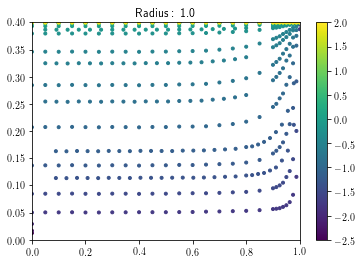

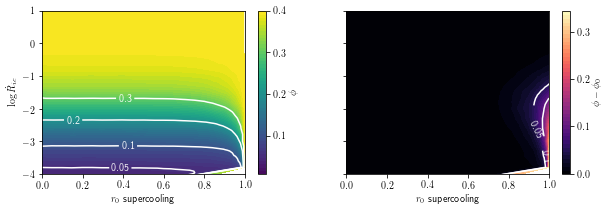

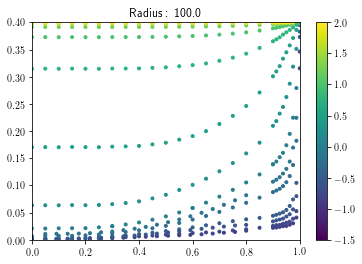

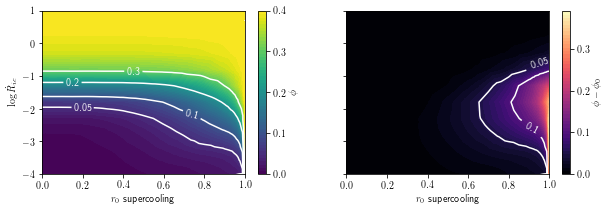

In [20]:
df.plot(y="sum_phi", use_index=True)
error=1e-12

def select_unique(dataframe):
    values = dataframe.unique()
    keep_values = np.abs(np.diff(values))>error
    keep_values = np.insert(keep_values,0,True)
    return values[keep_values]

#markers = ["x", "v","^"]
# fig, ax = plt.subplots()



radii = [1., 100.]#select_unique(df["Ric_adim"])

for radius in (radii):
    values = df[np.abs(df["Ric_adim"]-radius)<error]
    r_dot = select_unique(values["r_dot"])
    min_phi = np.zeros_like(r_dot)
    for i, growth_rate in enumerate(r_dot): 
        values_dot = values[np.abs(values["r_dot"]-growth_rate)<error]
        r_dot[i] = min(values_dot["sum_phi"])
        values.loc[np.abs(values["r_dot"]-growth_rate)<error, "min_phi"] = r_dot[i]
    fig, ax = plt.subplots()
    sc = ax.scatter(values["r0_supercooling"]/values["Ric_adim"], values["sum_phi"], 
               c= np.log10(values['coeff_velocity']), 
               marker='.',  cmap=plt.cm.get_cmap("viridis"))
    fig.colorbar(sc)
    ax.set_ylim([0, 0.4])
    ax.set_xlim([0, 1])
    ax.set_title("Radius : {}".format(radius))


    fig, ax  = plt.subplots(1, 2, figsize=[10, 3], sharey=True)
    sc = ax[0].tricontourf(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"], levels=50, vmin=0, vmax=0.4, cmap=plt.cm.get_cmap("viridis"))
    sc2 = ax[0].tricontour(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"], levels=[0.05, 0.1, 0.2, 0.3, 0.4], colors="w")
    fmt = {}
    strs = ["0.05", "0.1", "0.2", "0.3", "0.4"]
    for l, s in zip(sc2.levels, strs):
        fmt[l] = s
    ax[1].clabel(sc2, sc2.levels[::], fmt=fmt, inline=True)
    cbar = fig.colorbar(sc, ax=ax[0], ticks=[0., 0.1, 0.2, 0.3, 0.4])
    cbar.ax.set_ylabel("$\phi$")
    sc = ax[1].tricontourf(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"]-values["min_phi"], levels=50, cmap=plt.cm.get_cmap("magma"))
    cbar = fig.colorbar(sc, ax=ax[1], ticks=[0., 0.1, 0.2, 0.3, 0.4])
    cbar.ax.set_ylabel("$\phi - \phi_{0}$")
    sc2 = ax[1].tricontour(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"]-values["min_phi"], levels=[0.05, 0.10], colors="w")
    fmt = {}
    strs = ["0.05", "0.1"]
    for l, s in zip(sc2.levels, strs):
        fmt[l] = s
    ax[1].clabel(sc2, sc2.levels[::], fmt=fmt, inline=True)
    ax[1].set_ylim([-4,1])
    ax[0].set_ylim([-4,1])
    ax[0].set_ylabel("$\log \dot R_{ic}$")
    ax[1].set_xlabel("$r_0$ supercooling")
    ax[0].set_xlabel("$r_0$ supercooling")
    plt.savefig("radius_{}.pdf".format(radius))
    

Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_R_200/
oups, not a folder: /home/lasbleis-m/Research/output_mush/supercooling_R_200//data.csv


/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(new_indexer, value)
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pand

FileNotFoundError: [Errno 2] No such file or directory: '/home/lasbleis-m/.cache/matplotlib/tex.cache/1438cc1b18b5ac18c088b47f00758b08.dvi'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2cb8e058c8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'sum_phi'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/lasbleis-m/.cache/matplotlib/tex.cache/f3782a18c971b2854eeffbea1bcca027.
tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f3782a18c971b2854eeffbea1bcca027.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily sum_
                                                  phi}
No pages of output.
Transcript written on f3782a18c971b2854eeffbea1bcca027.log.




RuntimeError: latex was not able to process the following string:
b'sum_phi'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/lasbleis-m/.cache/matplotlib/tex.cache/f3782a18c971b2854eeffbea1bcca027.
tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 7 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./f3782a18c971b2854eeffbea1bcca027.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...tsize{10.000000}{12.500000}{\sffamily sum_
                                                  phi}
No pages of output.
Transcript written on f3782a18c971b2854eeffbea1bcca027.log.




<Figure size 432x288 with 1 Axes>

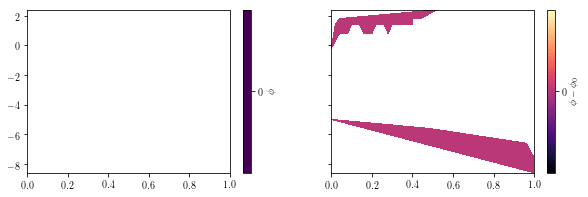

In [21]:
folder = "/home/lasbleis-m/Research/output_mush/supercooling_R_200/"

def add_value(df, ric, coeff, exp, phi, delta, r0_supercooling, tau_ic):
    df_add = pd.DataFrame({"Ric_adim":[ric], "coeff_velocity":[coeff], "exp":[exp], 
                           "sum_phi":[phi], "delta":[delta], 
                           "r0_supercooling":[r0_supercooling], 
                           "tau_ic":[tau_ic]})
    df = df.append(df_add, ignore_index=True)
    return df

list_subfolder = os.listdir(folder)
print("Looking through folder {}".format(folder))

columns = ["Ric_adim", "coeff_velocity", "exp", "sum_phi", "delta", "r0_supercooling", "tau_ic"]
df = pd.DataFrame(columns=columns)

for subfolder_name in list_subfolder:
            if os.path.isdir(folder + "/" + subfolder_name):
                list_files = os.listdir(folder+"/"+subfolder_name)
                for file in list_files:
                    if file[-14:] == "statistics.txt":
                        file_stat = folder + "/" + subfolder_name + "/" + file
                    if file[-5:] == ".yaml":
                        with open(folder + "/" + subfolder_name + "/" + file, 'r') as stream:
                            try:
                                param = yaml.safe_load(stream)
                                #print(param)
                            except yaml.YAMLError as exc:
                                print(exc)
                data = pd.read_csv(file_stat, sep=" ", index_col=False)
                
                if data["thickness_boundary"].iloc[-1] < 1e-12:
                    pass #print("no boundary for {}, {}".format(param["Ric_adim"], param['coeff_velocity']))
                try: 
                    supercooling = param["r0_supercooling"]
                    tic = param["tic"]
                except: 
                    supercooling = 0.
                    tic = param["time_max"]
                    
                if data["radius"].iloc[-1] < 0.99*param["Ric_adim"]:
                    remarks = "run ended before completion. Radius {}/{}".format(data["radius"], param["Ric_adim"])
                else:
                    remarks = ""
                    df = add_value(df, param["Ric_adim"], param['coeff_velocity'], param['growth_rate_exponent'], 
                            data["sum_phi"].iloc[-1], data["thickness_boundary"].iloc[-1], 
                               supercooling, tic)
                remarks=remarks+subfolder_name
                
                
            else: print("oups, not a folder: {}".format(folder + "/" + subfolder_name))
df.to_csv(folder+"data.csv")

df["r_dot"] = df["Ric_adim"]/df["tau_ic"]*df["exp"]
df = df.sort_values(by=["Ric_adim", 'r_dot', "sum_phi"]).reset_index(drop=True)


df.plot(y="sum_phi", use_index=True)
error=1e-12

radii = [200.]#select_unique(df["Ric_adim"])

for radius in (radii):
    values = df[np.abs(df["Ric_adim"]-radius)<error]
    r_dot = select_unique(values["r_dot"])
    min_phi = np.zeros_like(r_dot)
    for i, growth_rate in enumerate(r_dot): 
        values_dot = values[np.abs(values["r_dot"]-growth_rate)<error]
        r_dot[i] = min(values_dot["sum_phi"])
        values.loc[np.abs(values["r_dot"]-growth_rate)<error, "min_phi"] = r_dot[i]
    


    fig, ax  = plt.subplots(1, 2, figsize=[10, 3], sharey=True)
    sc = ax[0].tricontourf(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"], levels=50, vmin=0, vmax=0.4, cmap=plt.cm.get_cmap("viridis"))
    sc2 = ax[0].tricontour(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"], levels=[0.05, 0.1, 0.2, 0.3, 0.4], colors="w")
    fmt = {}
    strs = ["0.05", "0.1", "0.2", "0.3", "0.4"]
    for l, s in zip(sc2.levels, strs):
        fmt[l] = s
    ax[1].clabel(sc2, sc2.levels[::], fmt=fmt, fontsize=8, inline=True)
    cbar = fig.colorbar(sc, ax=ax[0], ticks=[0., 0.1, 0.2, 0.3, 0.4])
    cbar.ax.set_ylabel("$\phi$")
    sc = ax[1].tricontourf(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"]-values["min_phi"], levels=50, cmap=plt.cm.get_cmap("magma"))
    #ax[1].scatter(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']))
    #ax[0].scatter(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']))

    cbar = fig.colorbar(sc, ax=ax[1], ticks=[0., 0.1, 0.2, 0.3, 0.4])
    cbar.ax.set_ylabel("$\phi - \phi_{0}$")
    sc2 = ax[1].tricontour(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"]-values["min_phi"], levels=[0.02, 0.05, 0.1, 0.15], colors="w")
    sc3 = ax[0].tricontour(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"]-values["min_phi"], levels=[0.02, 0.05, 0.1, 0.15], colors="k")

    fmt = {}
    strs = ["0.02", "0.05", "0.1", "0.15"]
    for l, s in zip(sc2.levels, strs):
        fmt[l] = s
    ax[1].clabel(sc2, sc2.levels[::], fmt=fmt, fontsize=8, inline=True)
    ax[0].clabel(sc3, sc3.levels[::], fmt=fmt, fontsize=8, inline=True)
    ax[1].set_ylim([-4,1])
    ax[0].set_ylim([-4,1])
    ax[0].set_ylabel("$\log \dot R_{ic}$")
    ax[1].set_xlabel("$r_0$ supercooling")
    ax[0].set_xlabel("$r_0$ supercooling")
    plt.savefig("radius_{}.pdf".format(radius))
    

Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_R_200/
oups, not a folder: /home/lasbleis-m/Research/output_mush/supercooling_R_200//data.csv
Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_diagram/
oups, not a folder: /home/lasbleis-m/Research/output_mush/supercooling_diagram//data.csv


/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(new_indexer, value)
/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pand

[-2.5] 0.0
[-2.] 0.0
[-1.7] 0.4
[-1.5] 0.0
[-1.2] 0.4
[-1.] 0.0
[-0.7] 0.0
[-0.5] 0.0
[-0.3] 0.0
[-0.2] 0.0
[0.] 0.0
[0.2] 0.0
[0.3] 0.0
[0.5] 0.0
[0.7] 0.0
[1.] 0.0
[1.5] 0.0
[2.] 0.0
[-1.15] 0.5
[-1.35] 0.5


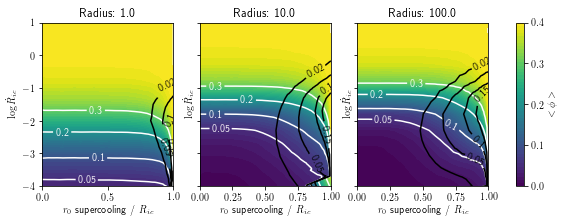

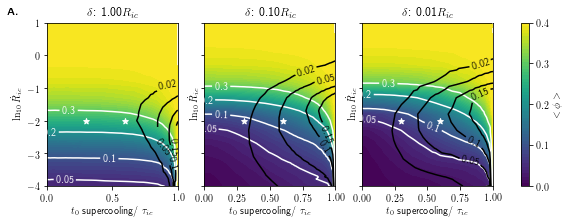

In [22]:
def add_value(df, ric, coeff, exp, phi, delta, r0_supercooling, tau_ic):
    df_add = pd.DataFrame({"Ric_adim":[ric], "coeff_velocity":[coeff], "exp":[exp], 
                           "sum_phi":[phi], "delta":[delta], 
                           "r0_supercooling":[r0_supercooling], 
                           "tau_ic":[tau_ic]})
    df = df.append(df_add, ignore_index=True)
    return df

def extract_values(folder):
    
    list_subfolder = os.listdir(folder)
    print("Looking through folder {}".format(folder))

    columns = ["Ric_adim", "coeff_velocity", "exp", "sum_phi", "delta", "r0_supercooling", "tau_ic"]
    df = pd.DataFrame(columns=columns)

    for subfolder_name in list_subfolder:
                if os.path.isdir(folder + "/" + subfolder_name):
                    list_files = os.listdir(folder+"/"+subfolder_name)
                    for file in list_files:
                        if file[-14:] == "statistics.txt":
                            file_stat = folder + "/" + subfolder_name + "/" + file
                        if file[-5:] == ".yaml":
                            with open(folder + "/" + subfolder_name + "/" + file, 'r') as stream:
                                try:
                                    param = yaml.safe_load(stream)
                                    #print(param)
                                except yaml.YAMLError as exc:
                                    print(exc)
                    data = pd.read_csv(file_stat, sep=" ", index_col=False)

                    if data["thickness_boundary"].iloc[-1] < 1e-12:
                        pass #print("no boundary for {}, {}".format(param["Ric_adim"], param['coeff_velocity']))
                    try: 
                        supercooling = param["r0_supercooling"]
                        tic = param["tic"]
                    except: 
                        supercooling = 0.
                        tic = param["time_max"]

                    if data["radius"].iloc[-1] < 0.99*param["Ric_adim"]:
                        remarks = "run ended before completion. Radius {}/{}".format(data["radius"], param["Ric_adim"])
                    else:
                        remarks = ""
                        df = add_value(df, param["Ric_adim"], param['coeff_velocity'], param['growth_rate_exponent'], 
                                data["sum_phi"].iloc[-1], data["thickness_boundary"].iloc[-1], 
                                   supercooling, tic)
                    remarks=remarks+subfolder_name
                else: print("oups, not a folder: {}".format(folder + "/" + subfolder_name))
    df["r_dot"] = df["Ric_adim"]/df["tau_ic"]*df["exp"]
    df = df.sort_values(by=["Ric_adim", 'r_dot', "sum_phi"]).reset_index(drop=True)
    return df



df_200 = extract_values("/home/lasbleis-m/Research/output_mush/supercooling_R_200/")
df_all = extract_values(folder = "/home/lasbleis-m/Research/output_mush/supercooling_diagram/")

df = pd.concat([df_200, df_all])

#print(df)

error=1e-12

radii = [1., 10., 100.]#select_unique(df["Ric_adim"])

fig, ax = plt.subplots(1, len(radii),figsize=[10, 3], sharey=True)
fig2, ax2 = plt.subplots(1, len(radii),figsize=[10, 3], sharey=True)


for i_fig, radius in enumerate(radii):
    values = df[np.abs(df["Ric_adim"]-radius)<error]
    r_dot = select_unique(values["r_dot"])
    #if i_fig==1: print(r_dot)
    min_phi = np.zeros_like(r_dot)
    
    for i, growth_rate in enumerate(r_dot): 
        values_dot = values[np.abs(values["r_dot"]-growth_rate)<error]
        min_phi[i] = min(values_dot["sum_phi"])
        values.loc[np.abs(values["r_dot"]-growth_rate)<error, "min_phi"] = min_phi[i]
        if i_fig==1: print(np.log10(select_unique(values_dot["coeff_velocity"])), 
                                         min(select_unique(values_dot["r0_supercooling"])))
        # r_supercooling =(values.loc[values_dot["sum_phi"] == min_phi[i]])
        # if i_fig==1:  print(r_supercooling)

    #if i_fig==1: print(values)

    sc = ax[i_fig].tricontourf(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"], levels=50, vmin=0, vmax=0.4, cmap=plt.cm.get_cmap("viridis"))
    sc_fig2 = ax2[i_fig].tricontourf((values["r0_supercooling"]/values["Ric_adim"])**2, np.log10(values['r_dot']), values["sum_phi"], levels=50, vmin=0, vmax=0.4, cmap=plt.cm.get_cmap("viridis"))

    #ax2[i_fig].scatter(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['coeff_velocity']))

    #ax[i_fig].scatter(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']))

    sc2 = ax[i_fig].tricontour(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"], levels=[0.05, 0.1, 0.2, 0.3, 0.4], colors="w")
    sc2_fig2 = ax2[i_fig].tricontour((values["r0_supercooling"]/values["Ric_adim"])**2, np.log10(values['r_dot']), values["sum_phi"], levels=[0.05, 0.1, 0.2, 0.3, 0.4], colors="w")

    fmt = {}
    strs = ["0.05", "0.1", "0.2", "0.3", "0.4"]
    for l, s in zip(sc2.levels, strs):
        fmt[l] = s
    ax[i_fig].clabel(sc2, sc2.levels[::], fmt=fmt, fontsize=10, inline=True)
    ax2[i_fig].clabel(sc2_fig2, sc2_fig2.levels[::], fmt=fmt, fontsize=10, inline=True)

    #if i_fig == len(radii)-1: 
    #    cbar = fig.colorbar(sc, ax=ax[i_fig], ticks=[0., 0.1, 0.2, 0.3, 0.4])
    #    cbar.ax.set_ylabel("$\phi$")
    sc3 = ax[i_fig].tricontour(values["r0_supercooling"]/values["Ric_adim"], np.log10(values['r_dot']), values["sum_phi"]-values["min_phi"], levels=[0.02, 0.05, 0.1, 0.15], colors="k")
    sc3_fig2 = ax2[i_fig].tricontour((values["r0_supercooling"]/values["Ric_adim"])**2, np.log10(values['r_dot']), values["sum_phi"]-values["min_phi"], levels=[0.02, 0.05, 0.1, 0.15], colors="k")

    fmt = {}
    strs = ["0.02", "0.05", "0.1", "0.15"]
    for l, s in zip(sc3.levels, strs):
        fmt[l] = s
    ax[i_fig].clabel(sc3, sc3.levels[::], fmt=fmt, fontsize=10, inline=True)
    ax[i_fig].set_ylim([-4,1])
    ax[i_fig].set_ylim([-4,1])
    ax[i_fig].set_ylabel(r"$\log \dot R_{ic}$")
    ax[i_fig].set_xlabel(r"$r_0$ supercooling / $R_{ic}$")
    ax[i_fig].set_title("Radius: {}".format(radius))
    
    ax2[i_fig].clabel(sc3_fig2, sc3_fig2.levels[::], fmt=fmt, fontsize=10, inline=True)
    ax2[i_fig].set_ylim([-4,1])
    ax2[i_fig].set_ylim([-4,1])
    ax2[i_fig].set_ylabel(r"$\ln_{{10}} \dot R_{ic}$")
    ax2[i_fig].set_xlabel(r"$t_0$ supercooling/ $\tau_{ic}$")
    ax2[i_fig].set_title(r"$\delta$: {:.2f}$R_{{ic}}$".format(1/radius))
    
    
    time = [0.3, 0.6]
    dot_R = -2*np.ones_like(time)
    ax2[i_fig].scatter(time, dot_R, c="w", marker="*")
    
    #plt.savefig("radius_1_100_200.pdf".format(radius))
    
ax2[0].text(-0.3, 1.10, r"\textbf{A.}", transform=ax2[0].transAxes, fontsize=11,
            verticalalignment='top')


cbar = fig.colorbar(sc, ax=ax.ravel().tolist(), ticks=[0., 0.1, 0.2, 0.3, 0.4])
cbar.ax.set_ylabel("$<\phi>$")
cbar2 = fig.colorbar(sc_fig2, ax=ax2.ravel().tolist(), ticks=[0., 0.1, 0.2, 0.3, 0.4])
cbar2.ax.set_ylabel("$<\phi>$")



plt.savefig("fig/supercooling_time.pdf", transparent=True, bbox_inches="tight")

Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_three/
0 0
0 1
0 2
1 0
1 1
1 2


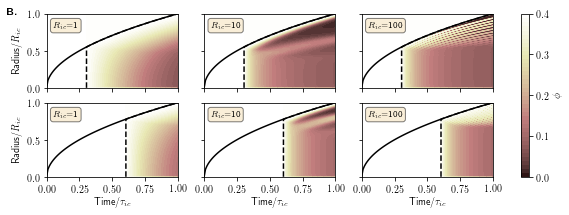

In [23]:
folder_main = "/home/lasbleis-m/Research/output_mush/supercooling_three/"



print("Looking through folder {}".format(folder_main))

list_subfolder_R1 = ["/home/lasbleis-m/Research/output_mush/supercooling_three/exp_5.00e-01_coeff_1.41e-01_radius_1.00e+00_r0_54.77225575051661",
                     "/home/lasbleis-m/Research/output_mush/supercooling_three/exp_5.00e-01_coeff_1.41e-01_radius_1.00e+00_r0_77.45966692414834"]

    #os.listdir(folder_main)
list_subfolder_R10 = ["/home/lasbleis-m/Research/output_mush/supercooling_three/exp_5.00e-01_coeff_4.47e-01_radius_1.00e+01_r0_54.77225575051661",
                     "/home/lasbleis-m/Research/output_mush/supercooling_three/exp_5.00e-01_coeff_4.47e-01_radius_1.00e+01_r0_77.45966692414834"]
    
list_subfolder_R100 = ["/home/lasbleis-m/Research/output_mush/supercooling_three/exp_5.00e-01_coeff_1.41e+00_radius_1.00e+02_r0_54.77225575051661",
                      "/home/lasbleis-m/Research/output_mush/supercooling_three/exp_5.00e-01_coeff_1.41e+00_radius_1.00e+02_r0_77.45966692414834"]

    
import operator

fig, ax =plt.subplots(2, 3, figsize=[10, 3], sharex=True, sharey=True)

for i_f, folder_R1 in enumerate(list_subfolder_R1):
    #fig, ax = plt.subplots()
    
    for j_f, folder in enumerate([folder_R1, list_subfolder_R10[i_f], list_subfolder_R100[i_f]]):
        file_stat, param, timesteps = figures.extract_files(folder)
        name_max = max(timesteps.items(), key=itemgetter(1))[0]
        data = pd.read_csv(name_max, sep=" ")
        dr = data["radius"][1]-data["radius"][0]
        Radius = np.array(data["radius"].values)+ dr / 2.
        #print(Radius)
        try: 
            supercooling = param["Dt_supercooling"]
            param["dot_r"] = param["Ric_adim"]/param["tic"]*param["growth_rate_exponent"]
        except: 
            supercooling = 0.
            param["dot_r"] = param["Ric_adim"]/param["time_max"]*param["growth_rate_exponent"]

        Time = supercooling+ np.array(sorted(timesteps.values()))
        
        #Time = Time/param["time_max"]
        #Radius = Radius/param["Ric_adim"]
        
        rayon = np.zeros_like(Time)
        #print((Time))
        X, Y = np.meshgrid(Time, Radius)
        Z = 0.4*np.ones_like(X)
        #print(timesteps)
        for i, (name, time) in enumerate(sorted(timesteps.items(), key = itemgetter(1))):
            data = pd.read_csv(name, sep=" ")
            #Porosity = np.array(data["porosity"].values)
            #N_r = len(Porosity)
            dr = data["radius"][1]-data["radius"][0]
            Porosity = np.array(data["porosity"].values)
            N_r = len(Porosity)
            Z[:N_r, i] = Porosity
            rayon[i] = data["radius"].iloc[-1]+dr/2
            #if i%50==0: ax.plot(data["radius"] + dr / 2., data["porosity"], label="t = {:.1f}".format(time))
            #if np.abs(time-200)<1: ax2.plot((data["radius"] + dr / 2.)/param["Ric_adim"], data["porosity"], label="Ric = {:.0e}".format(param["Ric_adim"]))

        #ax.set_ylim([0, 0.4])
        #ax.set_xlim([0., data["radius"].iloc[-1]+dr/2])
        #ax.legend()
        #print(param)
        

        X = X/param["tic"]
        Y = Y/param["Ric_adim"]
        print(i_f, j_f)
        levels = np.linspace(0, 0.4, 41)
        sc = ax[i_f, j_f].contourf(X, Y, Z, levels=levels, vmin=0, vmax = 0.4, cmap=plt.cm.get_cmap("pink"))
        #cb = fig.colorbar(sc, ticks=[0., 0.1, 0.2, 0.3, 0.4], ax=ax[i_f, j_f])
        #ax[i_f, j_f].set_xlim([0., time+supercooling])
        ax[i_f, j_f].set_xlim([0., 1.])
        ax[i_f, j_f].set_ylim([0., 1.])
        #ax[i_f, j_f].set_ylim([0., param["Ric_adim"]])
    
    
        ax[i_f, j_f].plot(np.append([Time[0]], Time)/param["tic"], np.append([0], rayon)/param["Ric_adim"], "--k")
        #print(Time)
        t = np.linspace(0, Time[-1], 100)
        ax[i_f, j_f].plot(t/param["tic"], rayon[-1]*np.sqrt(t/Time[-1])/param["Ric_adim"], 'k')
        #ax[i_f, j_f].plot(Time/param["tic"], rayon/param["Ric_adim"], "--")
        
        #
        #textstr = '\n'.join((
        #                r"$R_{{ic}}$={:.0f}".format(param["Ric_adim"]),
        #                r"$\dot R_{{ic}}$={:.0e}".format(param["dot_r"])))
        textstr = ((
                        r"$R_{{ic}}$={:.0f}".format(param["Ric_adim"])))

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax[i_f, j_f].text(0.05, 0.90, textstr, transform=ax[i_f, j_f].transAxes, fontsize=9,
            verticalalignment='top', bbox=props)
#ax2.legend()
#ax2.set_ylim([0, 0.4])
#ax2.set_xlim([0.,1.])
#ax2.set_xlabel("Radius/Ric")
#ax2.set_ylabel("Porosity")
#ax2.set_title("time = 200")

ax[0, 0].set_ylabel("Radius/$R_{{ic}}$")
ax[1, 0].set_ylabel("Radius/$R_{ic}$")

ax[1, 0].set_xlabel(r"Time/$\tau_{{ic}}$")
ax[1, 1].set_xlabel(r"Time/$\tau_{{ic}}$")
ax[1, 2].set_xlabel(r"Time/$\tau_{{ic}}$")

cb = fig.colorbar(sc, ticks=[0., 0.1, 0.2, 0.3, 0.4], ax=ax.ravel().tolist())
cb.set_label("$\phi$")


ax[0, 0].text(-0.3, 1.10, r"\textbf{B.}", transform=ax[0,0].transAxes, fontsize=11,
            verticalalignment='top')


plt.savefig("fig/profiles_supercooling.pdf", transparent=True, bbox_inches="tight")

/home/lasbleis-m/Research/output_mush/lotsoffigs/exp_5.00e-01_coeff_1.41e+00_radius_1.00e+00
0.0001 1.0000999999999225
0.0001 1.0000999999999225
(200,)
/home/lasbleis-m/Research/output_mush/lotsoffigs/exp_1.00e+00_coeff_1.00e-02_radius_1.00e+00
0.0001 0.9998999999999224
0.0001 0.9998999999999224
(200,)
/home/lasbleis-m/Research/output_mush/lotsoffigs/exp_1.00e+00_coeff_1.00e-01_radius_1.00e+02
0.01 100.00999999999723
0.01 100.00999999999723
(200,)
/home/lasbleis-m/Research/output_mush/lotsoffigs/exp_5.00e-01_coeff_1.00e+02_radius_1.00e+02
0.01 100.00999999999723
0.01 100.00999999999723
(200,)
/home/lasbleis-m/Research/output_mush/lotsoffigs/exp_5.00e-01_coeff_1.00e-01_radius_1.00e+01
0.001 10.001000000000008
0.001 10.001000000000008
(200,)
/home/lasbleis-m/Research/output_mush/lotsoffigs/exp_5.00e-01_coeff_1.00e+00_radius_1.00e+02
0.01 100.00999999999723
0.01 100.00999999999723
(200,)
/home/lasbleis-m/Research/output_mush/lotsoffigs/exp_1.00e+00_coeff_1.00e-03_radius_1.00e+02
0.01 99.5

/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/home/lasbleis-m/Research/output_mush/lotsoffigs/exp_5.00e-01_coeff_1.00e-01_radius_1.00e+00
0.0001 1.0000999999999225
0.0001 1.0000999999999225
(200,)


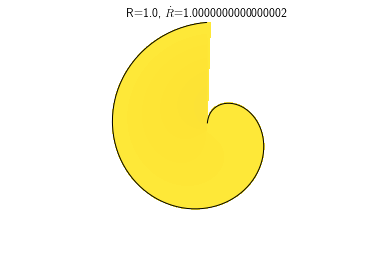

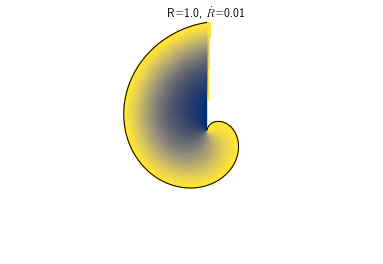

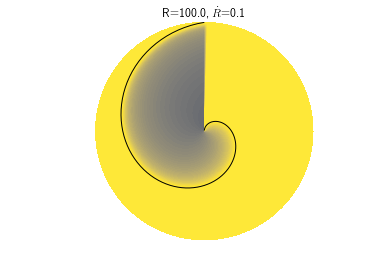

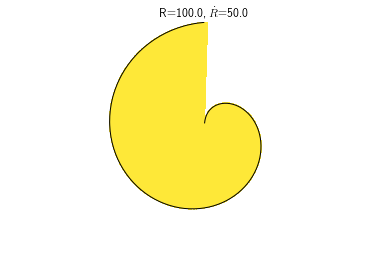

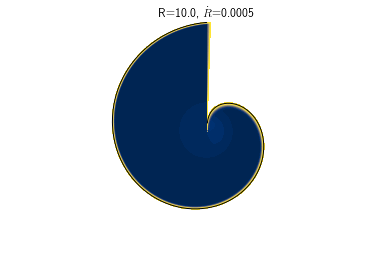

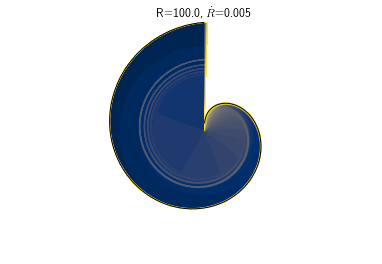

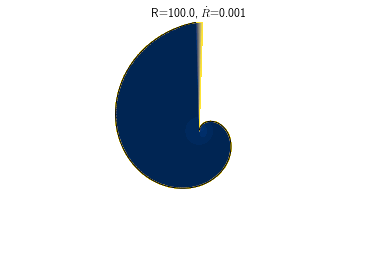

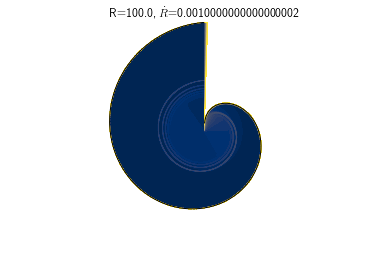

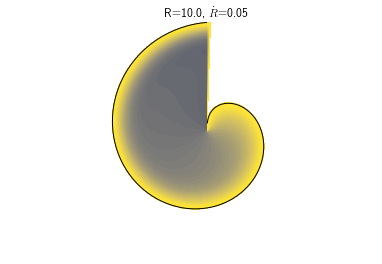

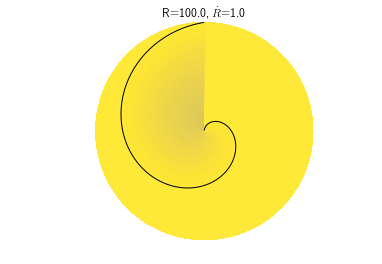

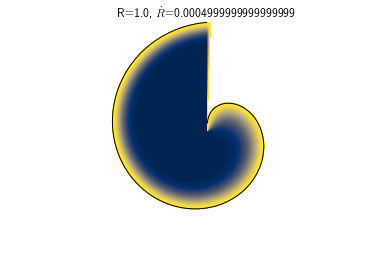

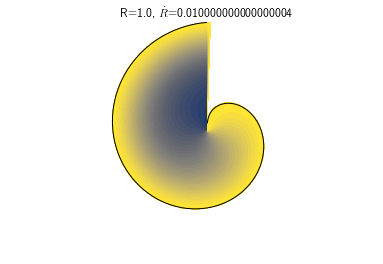

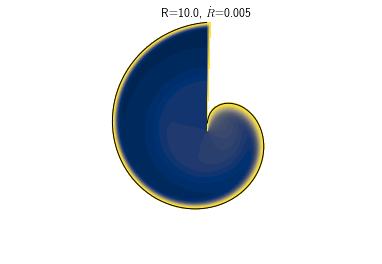

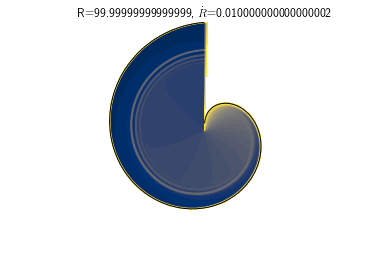

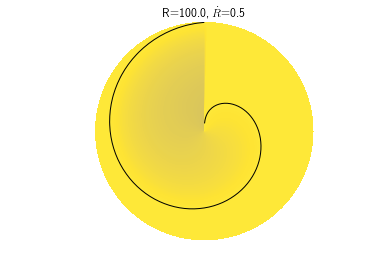

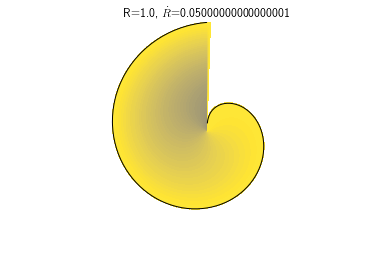

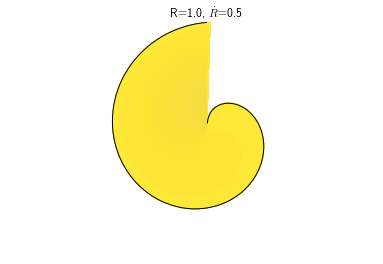

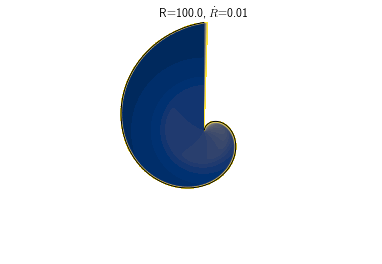

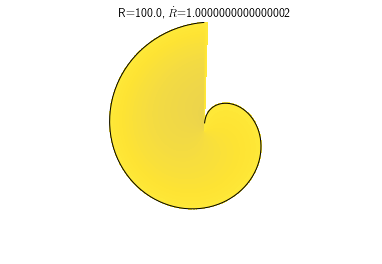

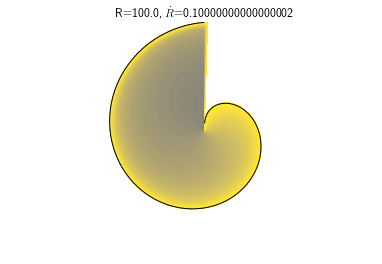

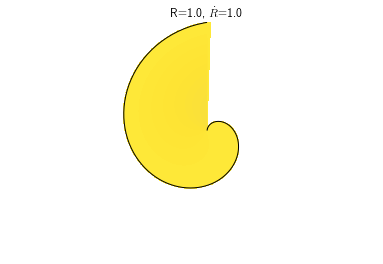

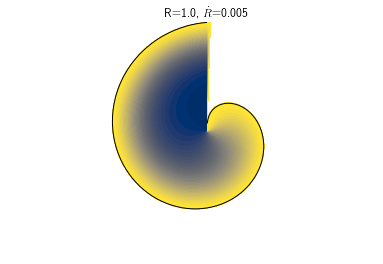

In [24]:





def figure_escargot(folder): 
    
    print(folder)
    file_stat, param, timesteps = figures.extract_files(folder)
    name_max = max(timesteps.items(), key=itemgetter(1))[0]
    data = pd.read_csv(name_max, sep=" ")
    dr = data["radius"][1]-data["radius"][0]
    Radius = np.array(data["radius"].values)+ dr / 2.
    N_radius = len(Radius)
    
    Radius_exp = Radius # np.linspace(0, 1, 500)**0.7 * Radius[-1]
    print(Radius[0], Radius[-1])
    print(Radius_exp[0], Radius_exp[-1])
    

    param["dot_r"] = param["Ric_adim"]/param["time_max"]*param["growth_rate_exponent"]


    Time = np.array(sorted(timesteps.values()))
    Time = Time
    print(Time.shape)
        #print((Time))
    rayon = np.zeros_like(Time)    

    X, Y = np.meshgrid(Time, Radius_exp)
    Z = 0.4*np.ones_like(X)
        #print(timesteps)

    
    for i, (name, time) in enumerate(sorted(timesteps.items(), key = itemgetter(1))):
            data = pd.read_csv(name, sep=" ")
            #Porosity = np.array(data["porosity"].values)
            #N_r = len(Porosity)
            dr = data["radius"][1]-data["radius"][0]
            rayon[int(i)] = data["radius"].iloc[-1]
            Porosity = np.array(data["porosity"].values)
            N_r = len(Porosity)
            f = interpolate.interp1d(Radius[:N_r], Porosity, fill_value="extrapolate")

            #print("rayon max", rayon[int(i)], np.where(Radius_exp>rayon[int(i)]))
            idx = np.where(Radius_exp>rayon[int(i)])[0][0]
            #print("index", i, idx)
            Porosity = f(Radius_exp[:idx])
            N_r = len(Porosity)
            
            Z[:N_r, int(i)] = Porosity
            

    fig, ax = plt.subplots()
    
   
    
    
    Period = param["time_max"]/2
    
    R, theta = Y, X*np.pi/Period
    X, Y = R*np.sin(theta), R*np.cos(theta)
    X = X.flatten()
    Y = Y.flatten()
    Z = Z.flatten()
    
    #p = np.random.permutation(len(X))[::200]
    #X, Y, Z = X[p], Y[p], Z[p]
    
    
    
    
    N = 1
    cont = ax.tricontourf(X[::N], Y[::N], Z[::N], levels=40, vmin=0, vmax = 0.4, cmap=plt.cm.get_cmap("cividis"))
    #ax.scatter(X, Y, c=Z,  s=1)
    
    x, y = rayon*np.sin(Time*np.pi/Period), rayon*np.cos(Time*np.pi/Period)
    clippath = Path(np.c_[x, y])
    patch = PathPatch(clippath, facecolor='none')
    ax.add_patch(patch)
    #for c in cont.collections:
        #c.set_clip_path(patch)
        
    ax.axis("equal")
    ax.axis("off")
    
    ax.set_title("R={}, $\dot R$={}".format(param["Ric_adim"], param["dot_r"]))
    
    fig.savefig(folder+"/escargot.png", dpi=300, bbox_inches="tight")
    
    #grid_x, grid_y = np.mgrid[-Radius[-1]:Radius[-1]:1000j, -Radius[-1]:Radius[-1]:1000j]
    #from scipy.interpolate import griddata
    #grid_z = griddata((X, Y), Z, (grid_x, grid_y), method='cubic')
    
    #fig2, ax2 = plt.subplots()
    #ax2.contourf(grid_x, grid_y, grid_z)
    #ax2.scatter(grid_x.flatten(), grid_y.flatten(), c=grid_z.flatten())

    
def figure_lineaire(folder): 
    file_stat, param, timesteps = figures.extract_files(folder)
    name_max = max(timesteps.items(), key=itemgetter(1))[0]
    data = pd.read_csv(name_max, sep=" ")
    dr = data["radius"][1]-data["radius"][0]
    Radius = np.array(data["radius"].values)+ dr / 2.

    param["dot_r"] = param["Ric_adim"]/param["time_max"]*param["growth_rate_exponent"]

    Time = np.array(sorted(timesteps.values()))
        #print((Time))
    rayon = np.zeros_like(Time)    

    X, Y = np.meshgrid(Time, Radius)
    Z = 0.4*np.ones_like(X)
        #print(timesteps)
    for i, (name, time) in enumerate(sorted(timesteps.items(), key = itemgetter(1))):
        data = pd.read_csv(name, sep=" ")
        #Porosity = np.array(data["porosity"].values)
        #N_r = len(Porosity)
        dr = data["radius"][1]-data["radius"][0]
        Porosity = np.array(data["porosity"].values)
        N_r = len(Porosity)
        Z[:N_r, i] = Porosity
        rayon[i] = data["radius"].iloc[-1]

    fig3, ax3 = plt.subplots(figsize=[10,3])
    sc = ax3.contourf(X, Y, Z, levels=40, vmin=0, vmax = 0.4, cmap=plt.cm.get_cmap("pink"))
    fig3.colorbar(sc)
    ax3.set_xlim([0., time])


    
folder = "/home/lasbleis-m/Research/output_mush/lotsoffigs/"
list_subfolder = os.listdir(folder)

for dossier in list_subfolder:
    figure_escargot(folder+dossier)
    #figure_lineaire(folder+dossier)


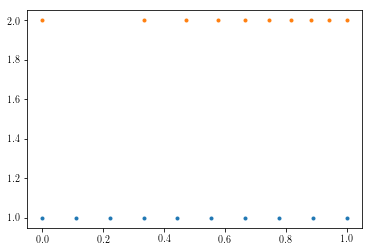

In [25]:
x = np.linspace(0, 1, 10)
value = np.ones_like(x)

fig, ax =plt.subplots()
ax.plot(x, value, '.')
ax.plot(x**0.5, value+1, '.')

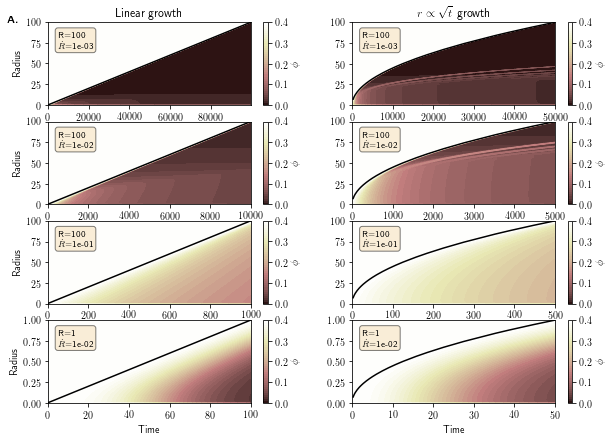

In [27]:
def figure_lineaire(folder, ax3, fig3):
    
    file_stat, param, timesteps = figures.extract_files(folder)
    name_max = max(timesteps.items(), key=itemgetter(1))[0]
    data = pd.read_csv(name_max, sep=" ")
    dr = data["radius"][1]-data["radius"][0]
    Radius = np.array(data["radius"].values)+ dr / 2.

    param["dot_r"] = param["Ric_adim"]/param["time_max"]*param["growth_rate_exponent"]

    Time = np.array(sorted(timesteps.values()))
        #print((Time))
    rayon = np.zeros_like(Time)    

    X, Y = np.meshgrid(Time, Radius)
    Z = 0.4*np.ones_like(X)
        #print(timesteps)
    for i, (name, time) in enumerate(sorted(timesteps.items(), key = itemgetter(1))):
        data = pd.read_csv(name, sep=" ")
        #Porosity = np.array(data["porosity"].values)
        #N_r = len(Porosity)
        dr = data["radius"][1]-data["radius"][0]
        Porosity = np.array(data["porosity"].values)
        N_r = len(Porosity)
        Z[:N_r, i] = Porosity
        rayon[i] = data["radius"].iloc[-1]

    #fig3, ax3 = plt.subplots(figsize=[10,3])
    levels = np.linspace(0, 0.4, 41)
    sc = ax3.contourf(X, Y, Z, levels=levels, vmin=0, vmax = 0.4, cmap=plt.cm.get_cmap("pink"))
    cb = fig3.colorbar(sc, ax=ax3, ticks=[0, 0.1, 0.2, 0.3, 0.4]) #, boundaries=np.linspace(0, 0.4, 6))
    #cb.set_clim(0, 0.4)
    ax3.set_xlim([0., time])
    ax3.plot(Time, rayon, 'k')
    cb.set_label("$\phi$")
    textstr = '\n'.join((
                    r"R={:.0f}".format(param["Ric_adim"]),
                    r"$\dot R$={:.0e}".format(param["dot_r"])))
    
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax3.text(0.05, 0.90, textstr, transform=ax3.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)
    
    
    
    



base = "/home/lasbleis-m/Research/output_mush/lotsoffigs/"
folders = ["exp_1.00e+00_coeff_1.00e-03_radius_1.00e+02",
           "exp_1.00e+00_coeff_1.00e-02_radius_1.00e+02", 
           "exp_1.00e+00_coeff_1.00e-01_radius_1.00e+02",
           #"exp_1.00e+00_coeff_1.00e+00_radius_1.00e+02", 
           "exp_1.00e+00_coeff_1.00e-02_radius_1.00e+00"]
folders_05=["exp_5.00e-01_coeff_4.47e-01_radius_1.00e+02",
            "exp_5.00e-01_coeff_1.41e+00_radius_1.00e+02",
            "exp_5.00e-01_coeff_4.47e+00_radius_1.00e+02",
           #"exp_5.00e-01_coeff_1.41e+01_radius_1.00e+02",
           "exp_5.00e-01_coeff_1.41e-01_radius_1.00e+00"]

N_fig = len(folders)
fig, ax = plt.subplots(N_fig, 2, figsize=[10, 7])

for i, folder in enumerate(folders):
    
    figure_lineaire(base+folder, ax[i, 0], fig)
    figure_lineaire(base+folders_05[i], ax[i, 1], fig)
    
    ax[i, 0].set_ylabel("Radius")
    
    
    
ax[-1, 0].set_xlabel("Time")
ax[-1, 1].set_xlabel("Time")
ax[0, 0].set_title("Linear growth")
ax[0, 1].set_title(r"$r\propto\sqrt{t}$ growth")

ax[0, 0].text(-0.2, 1.10, r"\textbf{A.}", transform=ax[0, 0].transAxes, fontsize=11,
            verticalalignment='top')

plt.savefig("fig/different_growth.pdf", transparent=True, bbox_inches="tight")

In [28]:
folder = "/home/lasbleis-m/Research/output_mush/diag_random_n3_all/"
data_n3 = figures.diagram_data(folder, "diag_random.csv")

Looking through folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all/
oups, not a folder: /home/lasbleis-m/Research/output_mush/diag_random_n3_all//data.csv
Run not finished for R 947.0982049419993, dot_R 9.422017206081331e-05: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all//exp_1.00e+00_coeff_9.42e-05_radius_9.47e+02
645.79 947.0982049419993
oups, not a folder: /home/lasbleis-m/Research/output_mush/diag_random_n3_all//diag_random.csv
Run not finished for R 990.1117469153911, dot_R 0.00011101962942087649: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all//exp_1.00e+00_coeff_1.11e-04_radius_9.90e+02
488.32 990.1117469153911
Run not finished for R 0.0010112211334163271, dot_R 414.9533637921495: folder /home/lasbleis-m/Research/output_mush/diag_random_n3_all//exp_1.00e+00_coeff_4.15e+02_radius_1.01e-03
0.00062696 0.0010112211334163271
